In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [11]:
# Set the path to your dataset
dataset_path = 'data'  # Replace with the actual path


In [12]:
import matplotlib.pyplot as plt

Labels in dataset: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


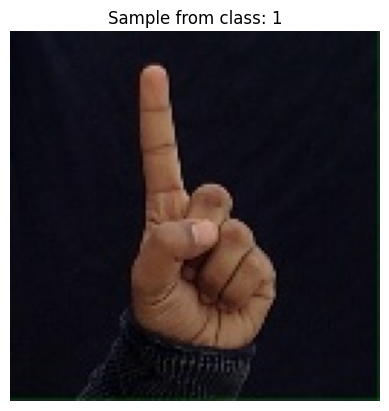

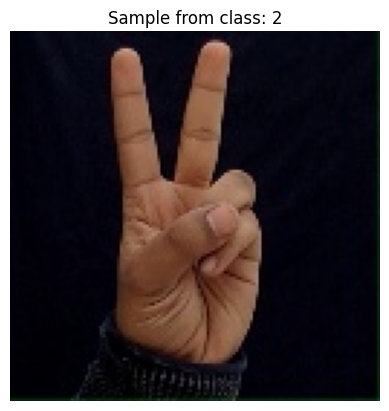

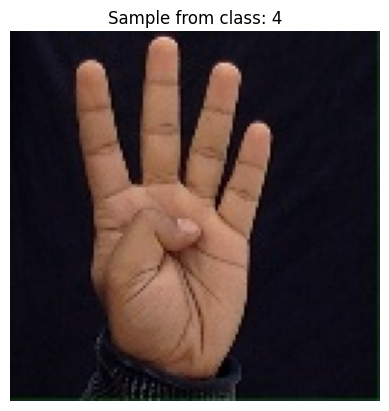

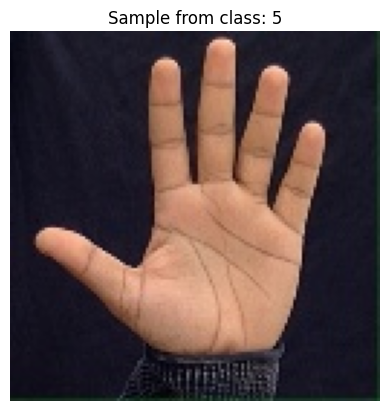

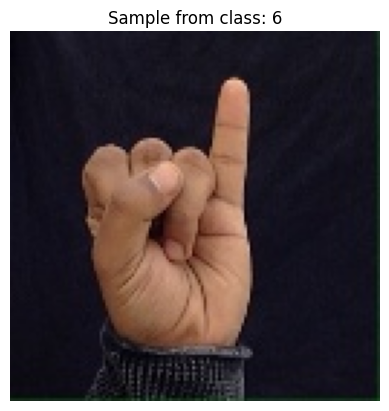

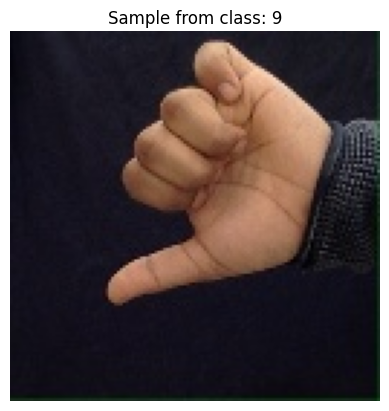

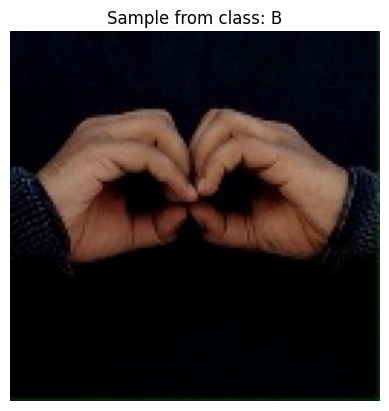

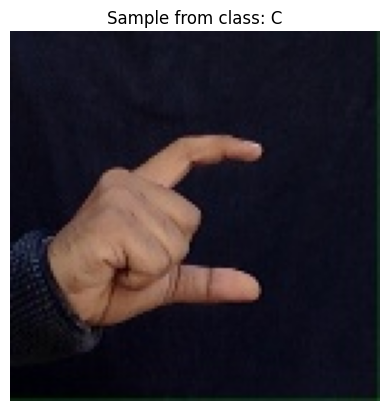

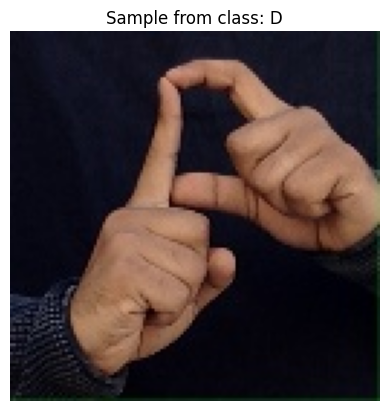

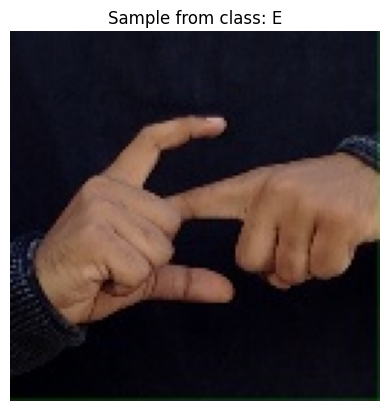

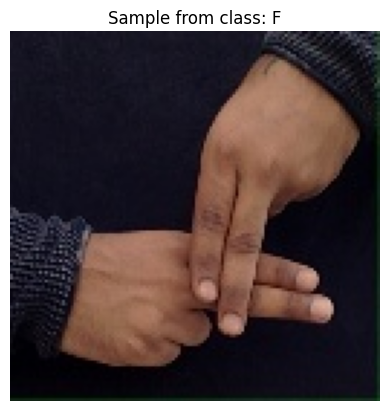

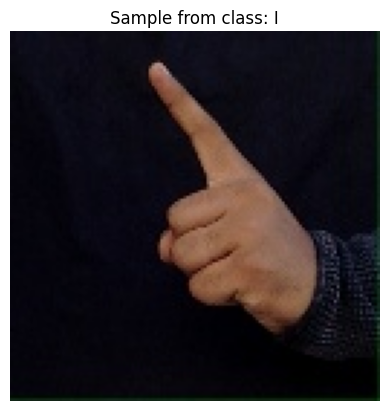

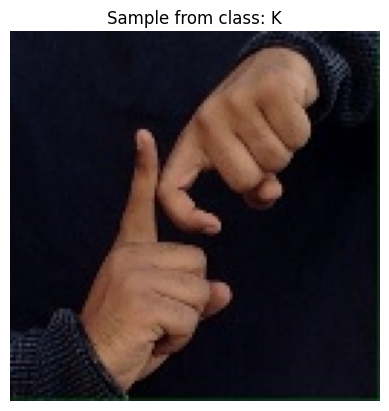

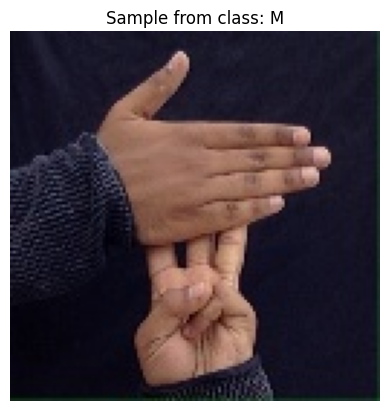

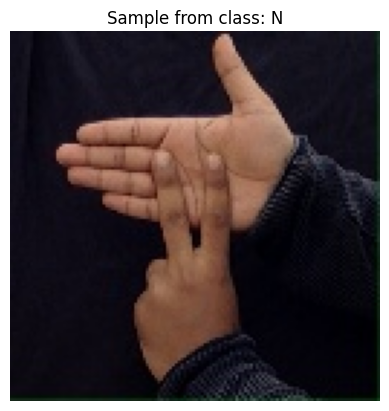

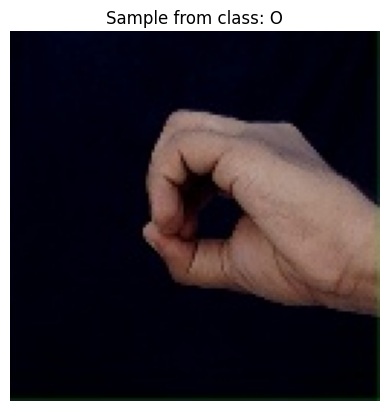

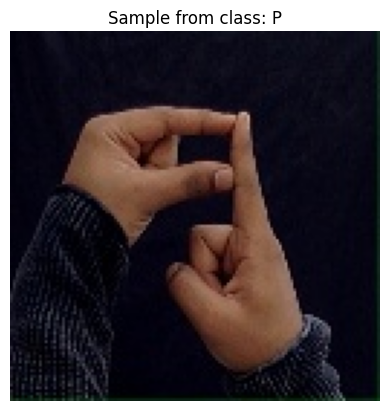

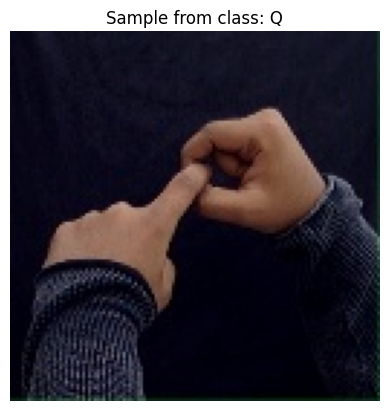

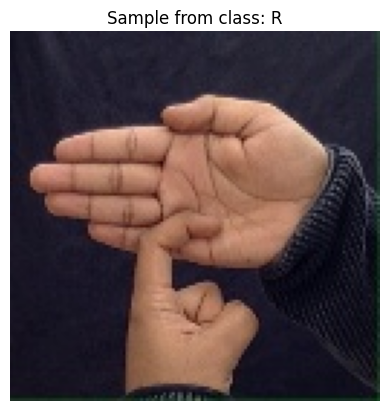

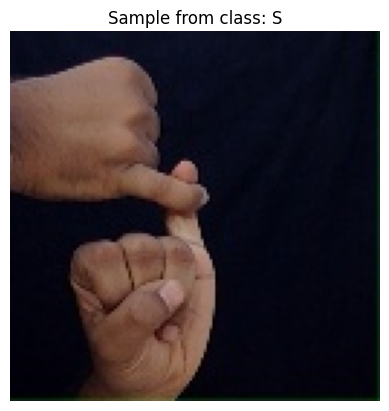

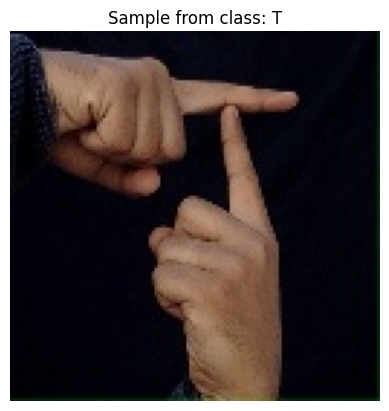

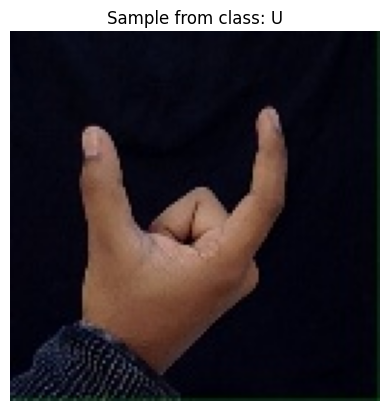

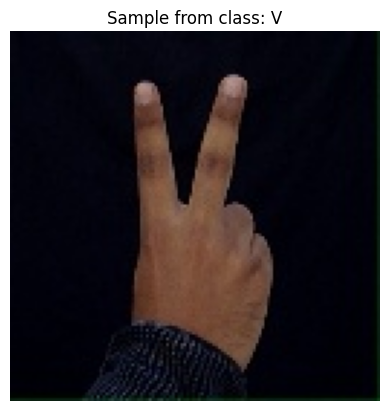

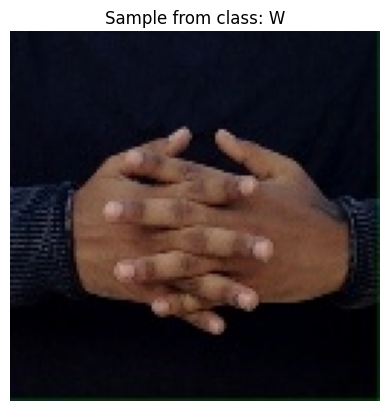

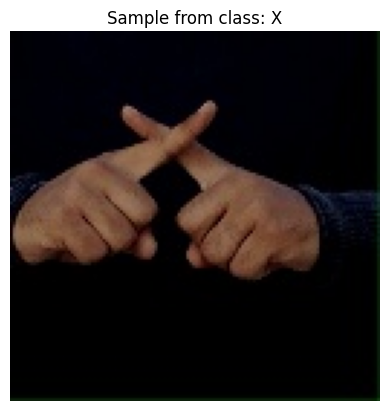

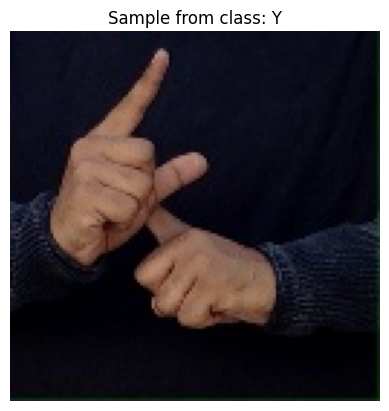

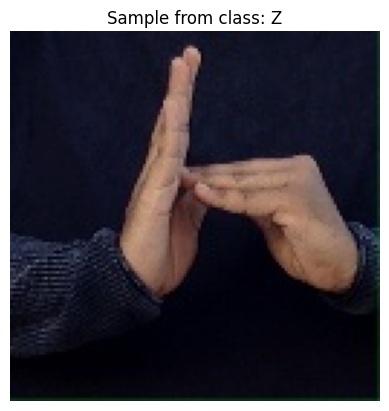

In [13]:
# List directories (should be the class labels)
labels = os.listdir(dataset_path)
print("Labels in dataset:", labels)

# Example: Display a sample image from each class
for label in labels:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        image_files = os.listdir(label_path)
        if image_files:
            sample_image_path = os.path.join(label_path, image_files[0])
            img = plt.imread(sample_image_path)
            plt.imshow(img)
            plt.title(f"Sample from class: {label}")
            plt.axis('off')
            plt.show()

In [14]:
# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=10,  # Randomly rotate images
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1,  # Randomly shift images vertically
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2  # Split 20% of the data for validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 33600 images belonging to 35 classes.
Found 8400 images belonging to 35 classes.


In [15]:
num_classes = len(train_generator.class_indices)  # Number of classes based on the new dataset

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [16]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    #callbacks=[early_stopping]
)


Epoch 1/15
1050/1050 [==============================] - 1006s 957ms/step - loss: 1.2810 - accuracy: 0.5907 - val_loss: 0.1551 - val_accuracy: 0.9627
Epoch 2/15
1050/1050 [==============================] - 928s 884ms/step - loss: 0.4468 - accuracy: 0.8401 - val_loss: 0.0775 - val_accuracy: 0.9754
Epoch 3/15
1050/1050 [==============================] - 350s 333ms/step - loss: 0.2730 - accuracy: 0.9049 - val_loss: 0.0181 - val_accuracy: 0.9965
Epoch 4/15
1050/1050 [==============================] - 626s 596ms/step - loss: 0.1966 - accuracy: 0.9293 - val_loss: 0.0129 - val_accuracy: 0.9963
Epoch 5/15
1050/1050 [==============================] - 718s 684ms/step - loss: 0.1603 - accuracy: 0.9449 - val_loss: 0.0116 - val_accuracy: 0.9971
Epoch 6/15
1050/1050 [==============================] - 688s 655ms/step - loss: 0.1256 - accuracy: 0.9561 - val_loss: 0.0081 - val_accuracy: 0.9979
Epoch 7/15
1050/1050 [==============================] - 523s 498ms/step - loss: 0.1048 - accuracy: 0.9643 - val

In [17]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


263/263 [==============================] - 37s 139ms/step - loss: 0.0013 - accuracy: 0.9995
Validation Loss: 0.0013336241245269775
Validation Accuracy: 0.9995238184928894


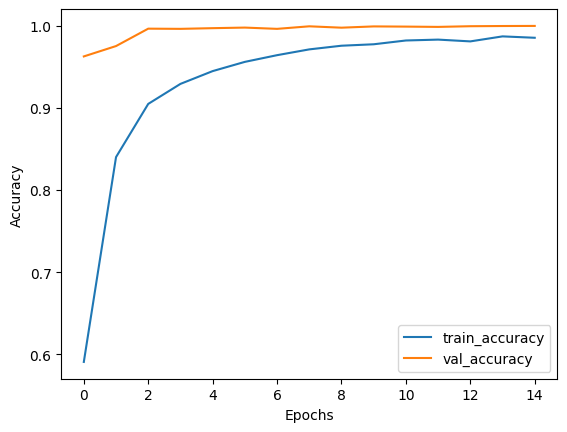

In [18]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


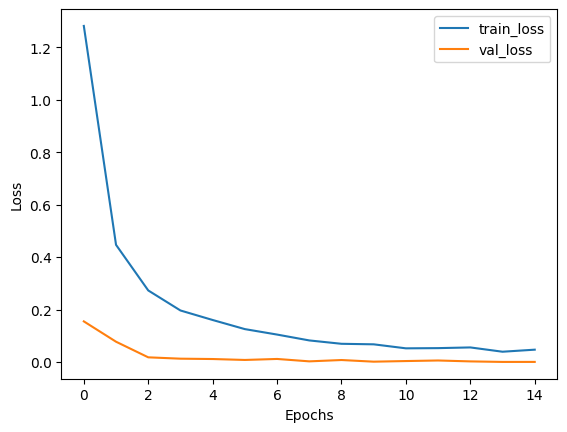

In [19]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model.save('model99.h5')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

model = load_model('model99.h5')

def preprocess_image(img_path, target_size=(128, 128)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array
def predict_image(img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    
    # Make prediction
    predictions = model.predict(img_array)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    # Get the class label
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]
    
    return predicted_label
# Path to the sample image
sample_image_path = r'data/V/1.jpg'  # Replace with the actual path

# Predict the class of the image
predicted_label = predict_image(sample_image_path)
print(f"The predicted label for the image is: {predicted_label}")



1/1 [==============================] - 0s 81ms/step
The predicted label for the image is: V


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('model99.h5')

# Preprocess the image as you defined
def preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

# Predict function for Gradio
def predict_image(img):
    img_array = preprocess_image(img)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_labels = list(train_generator.class_indices.keys())  # Replace with your actual class labels
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label

# Gradio interface
interface = gr.Interface(
    fn=predict_image,  # The function to run when the button is clicked
    inputs=gr.Image(type="filepath"),  # Input widget for uploading an image
    outputs="text",  # Output will be displayed as text
    title="Sign Language Prediction",
    description="Upload an image of a sign language symbol to predict its corresponding letter."
)

# Launch the interface
interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 103ms/step


In [3]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2

# Load the trained model
model = load_model('model99.h5')

# Preprocess the image from the webcam input
def preprocess_image(img, target_size=(128, 128)):
    img = cv2.resize(img, target_size)  # Resize to match model's expected input size
    img_array = np.expand_dims(img, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

# Predict function for Gradio
def predict_image(img):
    img_array = preprocess_image(img)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_labels = ['Class A', 'Class B', 'Class C']  # Replace with your actual class labels
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label

# Gradio interface
interface = gr.Interface(
    fn=predict_image,  # The function to run when the button is clicked
    inputs=gr.Image(source='webcam',type="numpy"),  # Use webcam input and process it as a NumPy array
    outputs="text",  # Output will be displayed as text
    title="Sign Language Prediction",
    description="Use your webcam to capture a sign language symbol and predict its corresponding letter."
)

# Launch the interface
interface.launch()


TypeError: Image.__init__() got an unexpected keyword argument 'source'